In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## GCN

In [3]:
gcn_res = pd.read_csv("../plots_data/GCN_Synthetic.csv")

In [4]:
df_gcn_cycles = gcn_res.loc[gcn_res.dataset=="Cycles",["depth","val_acc","test_acc"]]
df_gcn_necklaces = gcn_res.loc[gcn_res.dataset=="Necklaces",["depth","val_acc","test_acc"]]

df_gcn = {"Cycles":df_gcn_cycles, "Necklaces": df_gcn_necklaces}

## TopoGNN

In [5]:
topognn_res = pd.read_csv("../plots_data/TopoGNN_Synthetic.csv")

In [6]:
df_topognn_cycles = topognn_res.loc[topognn_res.dataset=="Cycles",["dim1","depth","val_acc","test_acc"]]
df_topognn_necklaces = topognn_res.loc[topognn_res.dataset=="Necklaces",["dim1","depth","val_acc","test_acc"]]

df_topognn = {"Cycles":df_topognn_cycles, "Necklaces": df_topognn_necklaces}

## TopoGNN Fake

In [8]:
topognn_fake_res = pd.read_csv("../plots_data/TopoGNN_Synthetic_Fake.csv")

In [9]:
df_topognn_fake_cycles = topognn_fake_res.loc[topognn_fake_res.dataset=="Cycles",["dim1","depth","val_acc","test_acc"]]
df_topognn_fake_necklaces = topognn_fake_res.loc[topognn_fake_res.dataset=="Necklaces",["dim1","depth","val_acc","test_acc"]]

df_topognn_fake = {"Cycles":df_topognn_fake_cycles, "Necklaces": df_topognn_fake_necklaces}

In [11]:
y_label = "val_acc"
linewidth = 2
dataset = "Cycles"

def plot_routine(y_label, dataset, linewidth = 2):

    plt.plot(df_gcn[dataset]["depth"].values, df_gcn[dataset][y_label],label="GCN",linewidth=linewidth)
    df_topo_dim1 = df_topognn[dataset].loc[df_topognn[dataset].dim1==True]
    plt.plot(df_topo_dim1["depth"].values, df_topo_dim1[y_label],label="TopoGNN (with dim1 persistence)",linewidth=linewidth)
    df_topo_no_dim1 = df_topognn[dataset].loc[df_topognn[dataset].dim1==False]
    plt.plot(df_topo_no_dim1["depth"].values, df_topo_no_dim1[y_label],label="TopoGNN (dim0 persistence only)",linewidth=linewidth)
    
    df_topofake_dim1 = df_topognn_fake[dataset].loc[df_topognn_fake[dataset].dim1==True]
    plt.plot(df_topofake_dim1["depth"].values, df_topofake_dim1[y_label],label="Fake TopoGNN (with dim1 persistence)",linewidth=linewidth)
    df_topofake_no_dim1 = df_topognn_fake[dataset].loc[df_topognn_fake[dataset].dim1==False]
    plt.plot(df_topofake_no_dim1["depth"].values, df_topofake_no_dim1[y_label],label="Fake TopoGNN (dim0 persistence only)",linewidth=linewidth)

    
    plt.xlabel("Number of layers")
    if y_label=="val_acc":
        plt.ylabel("Validation Accuracy")
    elif y_label=="test_acc":
        plt.ylabel("Validation Accuracy")
    else:
        raise("label not supported !")
    plt.title(f"Evolution of the performance with the number of layers - {dataset} dataset")
    plt.legend()
    plt.grid()
    plt.show()

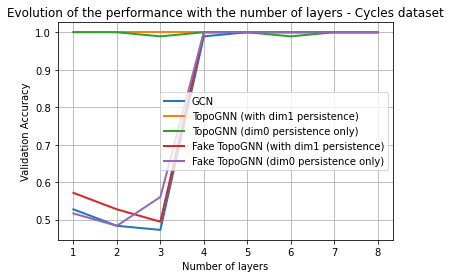

In [12]:
y_label = "val_acc"
linewidth = 2
dataset = "Cycles"

plot_routine(y_label, dataset, linewidth)

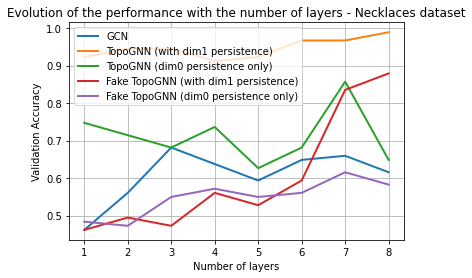

In [13]:
y_label = "val_acc"
linewidth = 2
dataset = "Necklaces"

plot_routine(y_label, dataset, linewidth)